In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
datatest = pd.read_excel('Resource/data3-28.xlsx')

In [3]:
datatest.head()

,Unnamed: 0,SPAD,AGB,LAI,Pn,Ci,Tr,Gs
0,B0-1,37.466667,1.708889,2.917709,16.573453,263.358997,3.381668,0.178455
1,B0-2,35.991667,2.063889,2.054150,22.759493,268.242120,5.887681,0.395477
2,B0-3,35.941667,1.997500,3.599002,16.718943,220.002423,4.542420,0.274608
3,B1-1,34.941667,1.362222,3.320240,18.022922,196.736997,3.629510,0.170752
4,B1-2,40.300000,1.965000,3.309667,17.883205,215.082727,4.303128,0.226866


In [4]:
# 读取对应指标
var_origin = datatest[['SPAD','AGB','LAI','Ci']]

In [5]:
# 变异系数法
def cv(data):
    mean_val = torch.mean(data,dim=0)
    std_val = torch.std(data,dim=0)
    cv_val = (std_val / mean_val)
    return cv

In [6]:
# 变异系数总和
def sum_cv(data):
    sum_var = {}
    mean_val = np.mean(data,axis=0)
    std_val = np.std(data,axis=0)
    cv_val = (std_val / mean_val)
    for i,var_name in enumerate(data.columns):
        sum_var[var_name] =cv_val[i]
    return sum_var

In [7]:
# 声明变异系数
cv_var = sum_cv(var_origin)
sum_vars = sum(cv_var.values())

In [8]:
# 通过变异系数法计算权重
def WeightOfCv(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    cv_val = (std_val / mean_val)
    weight = cv_val / sum_vars
    return weight

In [9]:
# 打印权重结果
print(WeightOfCv(var_origin))

SPAD    0.132697
AGB     0.307234
LAI     0.294787
Ci      0.265282
dtype: float64


D:\PythonFile\TestAI\venv\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [10]:
# 数据归一化 (极差变换法)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled =scaler.fit_transform(var_origin)

In [11]:
# 将数据转换为cuda类型

In [999]:
import torch
device =torch.device("cuda" if torch.cuda.is_available() else "cpu")
var =torch.FloatTensor(scaled).to(device)

In [1000]:
# print(var)

In [1001]:
# 计算CGMIcv(综合涨势检测指标)
# 定义计算公式函数
# 通过变异系数法计算的权重
weight_data = WeightOfCv(var_origin)

#将numpy arry 转换为 Tensor(张量)
weight_data = torch.FloatTensor(weight_data).to(device)

cgmicv = var*weight_data

#最终结果
def finallyResult(data):
    resultArray = {}
    per_sum = 0
    for i in range(len(cgmicv)):
        for j in range(len(cgmicv[i])):
            per_sum = per_sum+cgmicv[i][j]
            # print("per_sum",per_sum)
        resultArray[i] = per_sum
        per_sum = 0
    return resultArray

dataS = finallyResult(cgmicv)
# print(dataS)

for i in range(len(dataS)):
    print(dataS[i])

tensor(0.6259)
tensor(0.6030)
tensor(0.6625)
tensor(0.4799)
tensor(0.6478)
tensor(0.5633)
tensor(0.4158)
tensor(0.7427)
tensor(0.6011)
tensor(0.5659)
tensor(0.6065)
tensor(0.5869)
tensor(0.5453)
tensor(0.7001)
tensor(0.6584)
tensor(0.6285)
tensor(0.2647)
tensor(0.5159)
tensor(0.5150)
tensor(0.6175)
tensor(0.6618)
tensor(0.5273)
tensor(0.5831)
tensor(0.5964)
tensor(0.5667)
tensor(0.7490)
tensor(0.7878)
tensor(0.6832)
tensor(0.6049)
tensor(0.5674)
tensor(0.7514)
tensor(0.3915)
tensor(0.4732)
tensor(0.5584)
tensor(0.4700)
tensor(0.4013)
tensor(0.5426)
tensor(0.5707)
tensor(0.3230)
tensor(0.4222)
tensor(0.4788)
tensor(0.3384)
tensor(0.1533)
tensor(0.1720)
tensor(0.3911)
tensor(0.2985)
tensor(0.5575)
tensor(0.4942)
tensor(0.5162)
tensor(0.5976)
tensor(0.3584)
tensor(0.4908)
tensor(0.6012)
tensor(0.4894)
tensor(0.2116)
tensor(0.4287)
tensor(0.2641)
tensor(0.3210)
tensor(0.4118)
tensor(0.4197)
tensor(0.4655)
tensor(0.5310)
tensor(0.5904)
tensor(0.5348)
tensor(0.4264)
tensor(0.5148)


C:\Users\AnleHrc\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


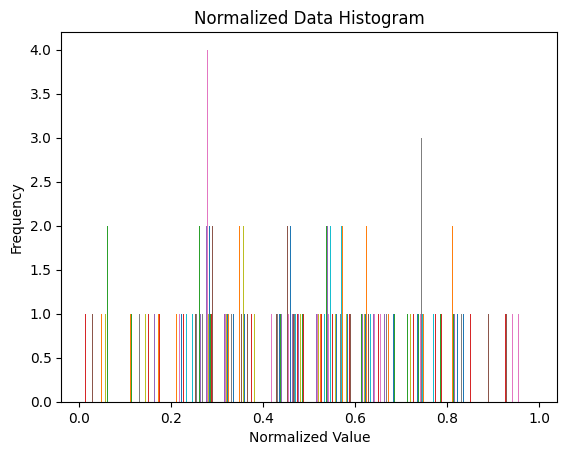

In [1002]:
# 归一化数据直方图
import matplotlib.pyplot as plt
# 绘制直方图
plt.hist(var)
plt.title("Normalized Data Histogram")
plt.xlabel("Normalized Value")
plt.ylabel("Frequency")
plt.show()